<a href="https://colab.research.google.com/github/alaajomah/ML/blob/main/CNN%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Transfer Learning**

*   Binary classification


#.
#الاء جمعة عبد الله الزيادات 32109303037
#32109303065 ايمان عبد الرحمن موسى غنيمات
#32109303011 مريم محمود عبدالقادر العجارمه
#32109303018 مروى عدنان سليمان الدحيات


In [ ]:
!pip install tensorflow
import warnings
warnings.filterwarnings('ignore')
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import applications
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator, img_to_array,Iterator
import numpy as np
from glob import glob


**Dataset:**  [link ](https://www.kaggle.com/datasets/utkarshsaxenadn/car-vs-bike-classification-dataset)

In [5]:

test_local_zip = '/content/dataset.zip'
zip_ref = zipfile.ZipFile(test_local_zip, 'r')
zip_ref.extractall('/tmp/dataset_split/train')
zip_ref.close()
val_local_zip = '/content/dataset.zip'
zip_ref = zipfile.ZipFile(val_local_zip, 'r')
zip_ref.extractall('/tmp/dataset_split/validation')

zip_ref.close()



In [7]:
# Define the training and validation base directories
train_dir = '/tmp/dataset_split/train'
validation_dir = '/tmp/dataset_split/validation'

# Directory with training Bike pictures
train_Bike_dir = os.path.join(train_dir, 'Bike')
# Directory with training Car pictures
train_Car_dir = os.path.join(train_dir, 'Car')
# Directory with validation horse pictures
validation_Bike_dir = os.path.join(validation_dir, 'Bike')
# Directory with validation human pictures
validation_Car_dir = os.path.join(validation_dir, 'Car')

# Check the number of images for each class and set
print(f"There are {len(os.listdir(train_Bike_dir))} images of Bike for training.\n")
print(f"There are {len(os.listdir(train_Car_dir))} images of Car for training.\n")
print(f"There are {len(os.listdir(validation_Bike_dir))} images of Bike for validation.\n")
print(f"There are {len(os.listdir(validation_Car_dir))} images of Car for validation.\n")

There are 1989 images of Bike for training.

There are 2000 images of Car for training.

There are 1989 images of Bike for validation.

There are 2000 images of Car for validation.



Sample Bike image:


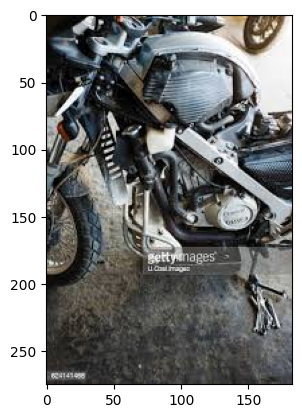


Sample Car image:


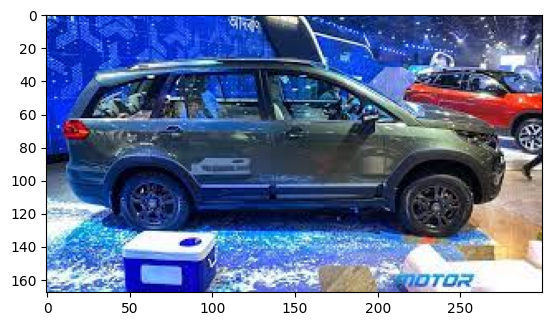

In [45]:
print("Sample Bike image:")
plt.imshow(load_img(f"{os.path.join(train_Bike_dir, os.listdir(train_Bike_dir)[0])}"))
plt.show()

print("\nSample Car image:")
plt.imshow(load_img(f"{os.path.join(train_Car_dir, os.listdir(train_Car_dir)[0])}"))
plt.show()

In [10]:
resent_model = ResNet50V2(include_top=False, weights='imagenet',input_shape=(300, 300, 3))


94668760/94668760 [==============================] - 4s 0us/step


In [11]:
for layer in resent_model.layers:
    layer.trainable = False

In [30]:

from tensorflow.keras.layers import GlobalAveragePooling2D

x = GlobalAveragePooling2D()(resent_model.output)
x = Dense(100, activation='relu')(x)
x = Dense(2, activation='sigmoid')(x)

model = Model(inputs=resent_model.input, outputs=x)


In [31]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)


In [32]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    horizontal_flip = True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [38]:
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (150,150),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

Found 3989 images belonging to 2 classes.


In [39]:
testing_set = test_datagen.flow_from_directory(validation_dir,
                                               target_size = (150,150),
                                               batch_size = 128,
                                               class_mode = 'categorical')


Found 3989 images belonging to 2 classes.


In [40]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [44]:
hist = model.fit(training_set,
                validation_data = testing_set,
                epochs = 20,
                )

Epoch 1/20
32/32 [==============================] - 794s 25s/step - loss: 0.0798 - accuracy: 0.9812 - val_loss: 0.0385 - val_accuracy: 0.9885
Epoch 2/20
32/32 [==============================] - 737s 23s/step - loss: 0.0603 - accuracy: 0.9784 - val_loss: 0.0325 - val_accuracy: 0.9887
Epoch 3/20
32/32 [==============================] - 735s 23s/step - loss: 0.0427 - accuracy: 0.9850 - val_loss: 0.0197 - val_accuracy: 0.9932
Epoch 4/20
32/32 [==============================] - 734s 23s/step - loss: 0.0326 - accuracy: 0.9890 - val_loss: 0.0173 - val_accuracy: 0.9945
Epoch 5/20
32/32 [==============================] - 735s 23s/step - loss: 0.0335 - accuracy: 0.9882 - val_loss: 0.0175 - val_accuracy: 0.9937
Epoch 6/20
32/32 [==============================] - 734s 23s/step - loss: 0.0281 - accuracy: 0.9902 - val_loss: 0.0154 - val_accuracy: 0.9940
Epoch 7/20
32/32 [==============================] - 736s 23s/step - loss: 0.0327 - accuracy: 0.9885 - val_loss: 0.0130 - val_accuracy: 0.9952
Epoch 

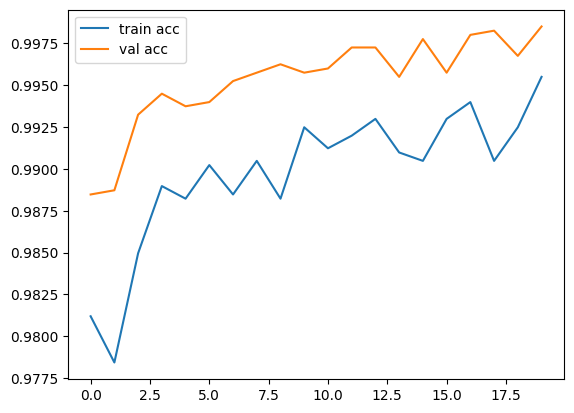

<Figure size 640x480 with 0 Axes>

In [46]:
# plot the accuracy
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')